In [6]:
# for loading/processing the images  
import tensorflow as tf

from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.resnet_v2 import preprocess_input 

# models 
from tensorflow.keras.applications import VGG16,VGG19,ResNet101V2
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans,MiniBatchKMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score,recall_score,cohen_kappa_score,precision_score,homogeneity_score


# Defining the model 



*   Je vais  utiliser un dataset aribtraire, exemple : Flower dataset dans Kaggle après on change ça avec notre propore dataset 

*   Ajout de pooling pour réduire la dimension 
*   Utilisation d'un VGG au lieu d'un Resnet 
*   Réduire les dimesnions avec un PCA 
*   application de Kmeans pour culstering










In [18]:
model = ResNet101V2(include_top=False,weights='imagenet',input_shape=(32,32,3),pooling='max')

171327488/171317808 [==============================] - 2s 0us/step


In [19]:
model.summary()

Model: "resnet101v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                                                        

In [20]:
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                                                            

# Data Preprocessing

In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()


169017344/169001437 [==============================] - 3s 0us/step


In [9]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:

# reshaping the images 
reshaped_img = img.reshape(1,224,224,3)
print(reshaped_img.shape)

(1, 224, 224, 3)


In [21]:

def get_features(file, model):
    # get l'image  224x224 
   
    imgx = preprocess_input(x_train)
    features = model.predict(imgx, use_multiprocessing=True)
    return features


In [22]:
# boucle sur l'ensemble des images

data = {}

for i in x_train:
  feat = get_features(i,model)
  data[i] = feat

filenames = np.array(list(data.keys()))

# liste des features
feat = np.array(list(data.values()))
feat.shape



TypeError: ignored

In [24]:
feat = feat.reshape(-1,2048)
feat.shape

(50000, 2048)

# PCA

In [25]:
#application de PCA
pca = PCA(n_components=150, random_state=42)
pca.fit(feat)
x = pca.transform(feat)

# Kmeans 




In [26]:
kmeans = KMeans(n_clusters=10,init='k-means++')
kmeans.fit(x)

KMeans(n_clusters=10)

In [27]:
kmeans.labels_


array([6, 6, 0, ..., 6, 7, 6], dtype=int32)

In [ ]:

groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [ ]:
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    files = groups[cluster]
    # Affichage d'un ensemble de 30
    
    # Afficher chaque image dans son cluster 
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

['0003.png',
 '0014.png',
 '0015.png',
 '0021.png',
 '0023.png',
 '0027.png',
 '0034.png',
 '0043.png',
 '0047.png',
 '0053.png',
 '0061.png',
 '0072.png',
 '0102.png',
 '0106.png',
 '0113.png',
 '0120.png',
 '0122.png',
 '0127.png',
 '0132.png',
 '0139.png',
 '0146.png',
 '0151.png',
 '0153.png',
 '0154.png',
 '0164.png',
 '0166.png',
 '0167.png',
 '0179.png',
 '0190.png',
 '0192.png',
 '0209.png']

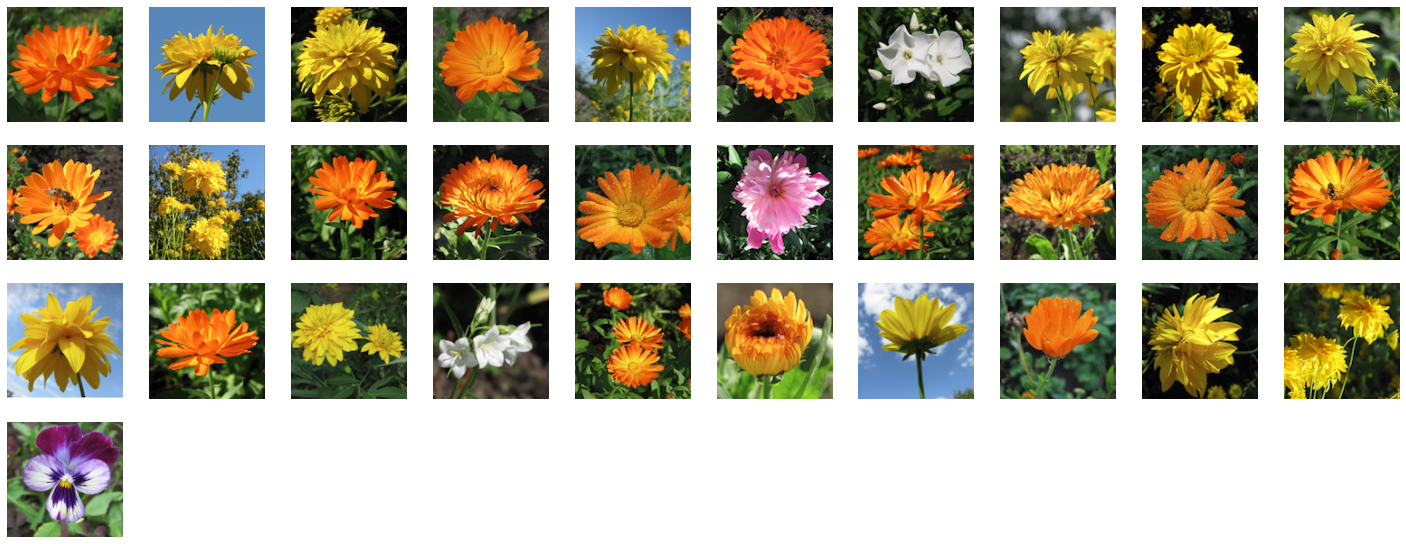

In [ ]:
view_cluster(0)
len(groups[0])
groups[0]

['0009.png',
 '0017.png',
 '0036.png',
 '0041.png',
 '0049.png',
 '0058.png',
 '0060.png',
 '0063.png',
 '0064.png',
 '0096.png',
 '0097.png',
 '0099.png',
 '0108.png',
 '0109.png',
 '0117.png',
 '0128.png',
 '0136.png',
 '0147.png',
 '0158.png',
 '0175.png',
 '0180.png',
 '0181.png',
 '0183.png',
 '0195.png',
 '0203.png']

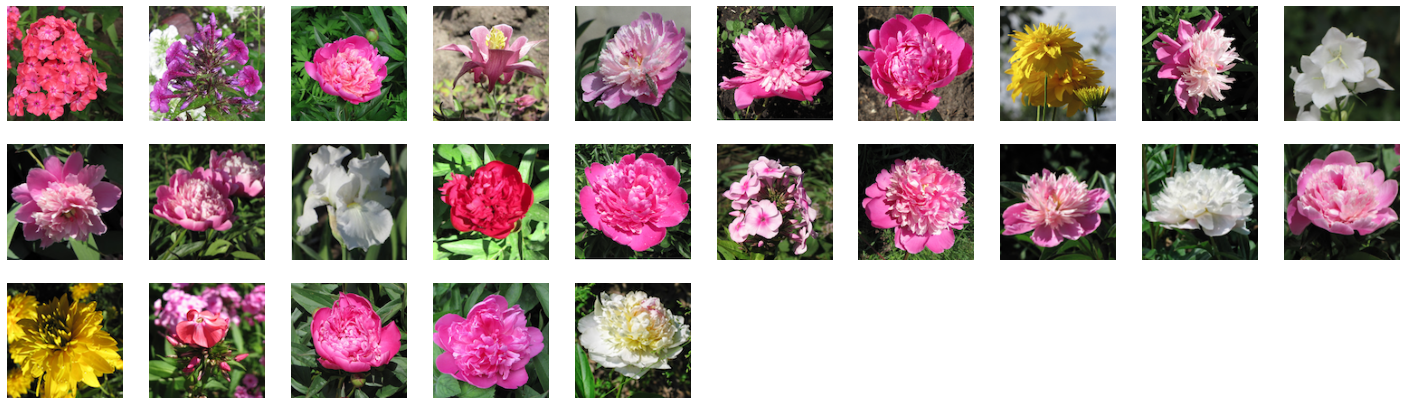

In [ ]:
view_cluster(9)
groups[9]

['0002.png',
 '0004.png',
 '0010.png',
 '0018.png',
 '0026.png',
 '0029.png',
 '0032.png',
 '0056.png',
 '0091.png',
 '0116.png',
 '0138.png',
 '0161.png']

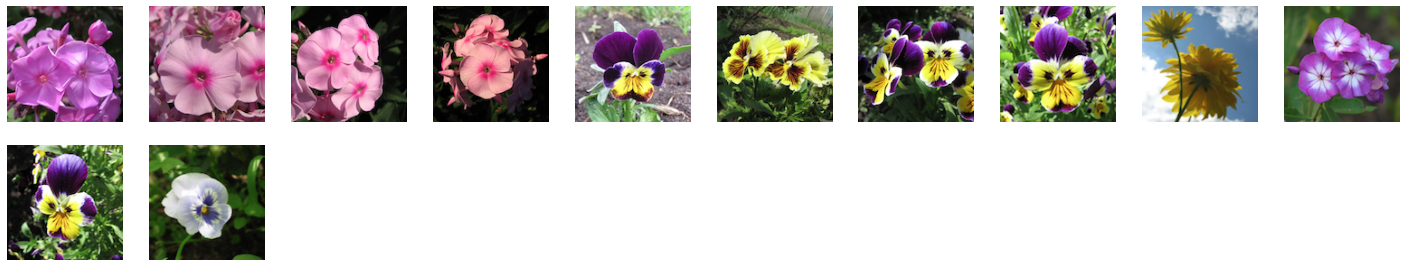

In [ ]:
view_cluster(3)
groups[3]

In [ ]:
x.shape

(210, 150)

In [ ]:
print(kmeans.labels_)
df = pd.read_csv('flower_labels.csv')

print(df['label'].tolist())

[8 3 0 3 8 4 1 4 9 3 6 8 8 0 0 6 9 3 1 1 0 2 0 2 1 3 0 6 3 5 6 3 8 0 8 9 6
 6 2 1 9 8 0 8 4 2 0 8 9 4 5 2 0 6 8 3 6 9 1 9 0 4 9 9 1 6 8 8 5 2 6 0 6 6
 6 6 8 1 4 7 4 2 7 6 8 6 2 2 5 2 3 7 1 2 4 9 9 6 9 6 4 0 2 6 5 0 4 9 9 8 1
 2 0 8 6 3 9 5 1 0 6 0 2 1 7 6 0 9 4 5 6 0 4 2 2 9 5 3 0 2 8 2 6 1 2 0 9 2
 8 5 0 2 0 0 8 8 4 9 8 8 3 6 8 0 7 0 0 6 5 6 6 7 7 8 9 1 4 2 0 9 9 6 9 5 6
 8 5 4 5 0 2 0 4 6 9 7 5 6 5 2 4 6 9 6 2 5 5 2 0 7]
[0, 0, 2, 0, 0, 1, 6, 0, 0, 0, 0, 0, 0, 7, 7, 1, 0, 0, 6, 0, 2, 4, 7, 4, 5, 6, 2, 5, 6, 6, 3, 6, 5, 0, 3, 8, 5, 9, 2, 8, 9, 1, 7, 3, 1, 4, 7, 3, 8, 1, 3, 4, 7, 9, 3, 6, 5, 8, 6, 8, 2, 1, 7, 8, 0, 5, 6, 3, 6, 4, 9, 7, 9, 1, 5, 3, 6, 6, 8, 3, 1, 4, 3, 9, 8, 5, 2, 4, 6, 4, 7, 1, 5, 2, 1, 5, 8, 5, 8, 3, 1, 2, 4, 5, 1, 2, 8, 3, 8, 3, 5, 4, 2, 9, 5, 0, 8, 6, 0, 8, 5, 2, 4, 5, 8, 3, 2, 0, 8, 6, 9, 2, 8, 4, 5, 8, 0, 6, 2, 4, 9, 4, 5, 5, 2, 7, 8, 4, 9, 3, 2, 4, 7, 5, 9, 3, 1, 8, 1, 3, 6, 9, 1, 2, 8, 2, 7, 9, 9, 5, 9, 8, 3, 9, 8, 5, 1, 4, 2, 7, 0, 5, 8, 6, 3, 9, 6, 1, 3, 7, 4,

# Perspectives


*   Test sur le dataset de PMA
*   Utilisation de diffrenetes métrique de mesure (Cosine similarity, etc) 
*   Utilisation d'autre algorithmes de clustering (DGB,random forest, etc) 
*   Utilisation d'autre Backbone de NN pour l'extraction des features




In [ ]:
label = df['label'].to_numpy()


# Defining metrics 

In [28]:
def classifier_summary(y_test, y_pred_test):

    
    test_accuracy = np.round(accuracy_score(y_test, y_pred_test),4)*100
    test_precision = np.round(precision_score(y_test, y_pred_test, average='weighted'),4)
    test_recall = np.round(recall_score(y_test, y_pred_test, average='weighted'),4)
    test_F1 = np.round(f1_score(y_test, y_pred_test, average='weighted'),4)
    test_kappa =  np.round(cohen_kappa_score(y_test, y_pred_test),4) 
    homogeneity = np.round(homogeneity_score(y_test, y_pred_test),4)
    test_confusion_matrix = confusion_matrix(y_test,y_pred_test)
    

    
    

    
    print()
    print('------------------------ Test Set Metrics------------------------')
    print()
    print("accuracy : {}%".format(test_accuracy))
    print("F1_score : {}".format(test_F1))
    print("Cohen Kappa Score : {} ".format(test_kappa))
    print("Recall : {}".format(test_recall))
    print("Precision : {}".format(test_precision))
    print("Humogeneity : {}".format(homogeneity))
    print("Confusion Matrix : {}".format(test_confusion_matrix))

    print("-"*80)
    print()

    return homogeneity

In [ ]:
kmeans.n_clusters

10

In [29]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    # Loop through the clusters
    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]
        
    return inferred_labels  



In [30]:
def infer_data_labels(Y_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(Y_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(Y_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [33]:


clusters = [3,4,5,6,7,8,9,10, 16, 36, 64,144,200]
iner_list = []
homo_list = []
acc_list = []
y_train = y_train.reshape(5000,-1)

for n_clusters in clusters:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(x)
    
   
    iner_list.append(kmeans.inertia_)
    
    
    # Determine predicted labels
    cluster_labels = infer_cluster_labels(kmeans, y_train)
    prediction = infer_data_labels(kmeans.labels_, cluster_labels)
    homo = classifier_summary(y_train, prediction)
    homo_list.append(homo)

    acc = accuracy_score(y_train, prediction)
    acc_list.append(acc)


IndexError: ignored

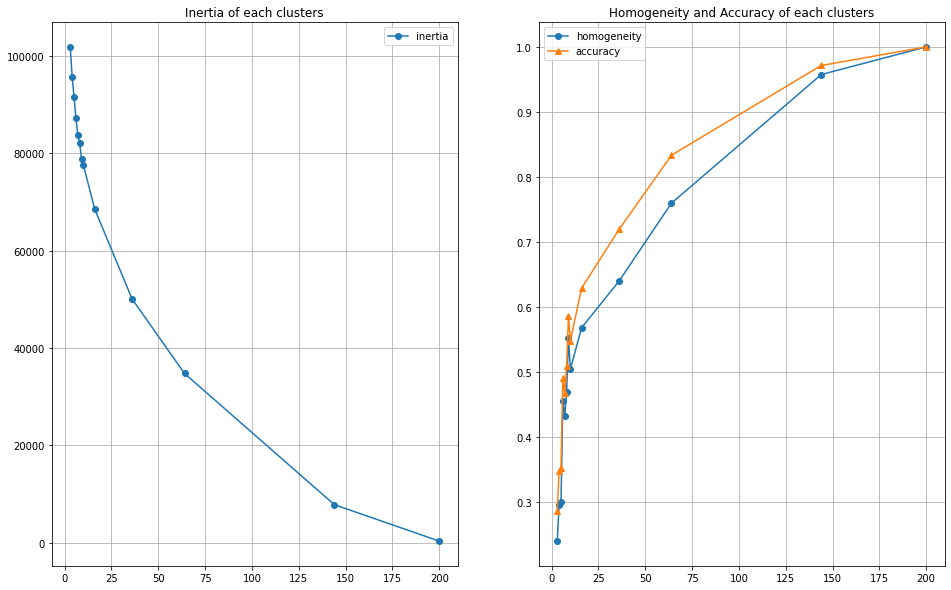

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 10))
ax[0].plot(clusters, iner_list, label='inertia', marker='o')
ax[1].plot(clusters, homo_list, label='homogeneity', marker='o')
ax[1].plot(clusters, acc_list, label='accuracy', marker='^')
ax[0].legend(loc='best')
ax[1].legend(loc='best')
ax[0].grid('on')
ax[1].grid('on')
ax[0].set_title('Inertia of each clusters')
ax[1].set_title('Homogeneity and Accuracy of each clusters')
plt.show()